# Import Modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import xgboost as xgb
%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv("Data_set (Final).csv")
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status
0,1,1,Graduate,5849,0.0,0,Yes,Yes,NaN,360.0,...,3,1,3,0,3,6,4,0,0,Y
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.0,360.0,...,0,5,0,0,5,1,1,1,1,N
2,3,0,Graduate,3000,0.0,0,No,Yes,66.0,360.0,...,1,4,0,5,5,2,3,4,1,Y
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.0,360.0,...,0,3,2,5,3,7,4,5,1,Y
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.0,360.0,...,0,4,3,0,3,2,2,0,2,Y


In [3]:
df.describe()

,Sr_no,Cases,Applicant_Income,Family_Income,Total_assets,Loan_Amount,Loan_Amount_Term,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature
count,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,1.973941,5403.459283,1621.245798,2.488599,146.412162,342.00000,2.473941,2.47557,2.612378,2.555375,2.421824,2.620521,2.532573,3.522801,2.586319,2.521173,2.359935
std,177.390811,1.388359,6109.041673,2926.248369,1.679655,85.587325,65.12041,1.642166,1.66194,1.750202,1.653321,1.748338,1.711958,1.669635,2.319919,1.625111,1.757401,1.701863
min,1.000000,0.000000,150.000000,0.000000,0.000000,9.000000,12.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.250000,1.000000,2877.500000,0.000000,1.000000,100.000000,360.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,307.500000,2.000000,3812.500000,1188.500000,3.000000,128.000000,360.00000,2.500000,3.00000,3.000000,3.000000,2.000000,3.000000,2.000000,4.000000,3.000000,2.000000,2.000000
75%,460.750000,3.000000,5795.000000,2297.250000,4.000000,168.000000,360.00000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,4.000000,4.000000,4.000000
max,614.000000,4.000000,81000.000000,41667.000000,5.000000,700.000000,480.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000


In [4]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
Sr_no                  614 non-null int64
Cases                  614 non-null int64
Education              614 non-null object
Applicant_Income       614 non-null int64
Family_Income          614 non-null float64
Total_assets           614 non-null int64
Business_type          614 non-null object
Credit                 614 non-null object
Loan_Amount            592 non-null float64
Loan_Amount_Term       600 non-null float64
Rating_Reviewportal    614 non-null int64
Daily_Sales            614 non-null int64
Competition            614 non-null int64
Rent_Wages             614 non-null int64
Size_Shop              614 non-null int64
Location               614 non-null int64
Supply                 614 non-null int64
Total_Workers          614 non-null int64
No_customers           614 non-null int64
Freq_Supply_pay        614 non-null int64
Nature                 614 non-null int64
Loan

# Preprocessing the Dataset

In [6]:
# find the null values
df.isnull().sum()

Sr_no                   0
Cases                   0
Education               0
Applicant_Income        0
Family_Income           0
Total_assets            0
Business_type           0
Credit                  0
Loan_Amount            22
Loan_Amount_Term       14
Rating_Reviewportal     0
Daily_Sales             0
Competition             0
Rent_Wages              0
Size_Shop               0
Location                0
Supply                  0
Total_Workers           0
No_customers            0
Freq_Supply_pay         0
Nature                  0
Loan_Status             0
dtype: int64

In [7]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [8]:
#check whether all null values are removed
df.isnull().sum()

Sr_no                  0
Cases                  0
Education              0
Applicant_Income       0
Family_Income          0
Total_assets           0
Business_type          0
Credit                 0
Loan_Amount            0
Loan_Amount_Term       0
Rating_Reviewportal    0
Daily_Sales            0
Competition            0
Rent_Wages             0
Size_Shop              0
Location               0
Supply                 0
Total_Workers          0
No_customers           0
Freq_Supply_pay        0
Nature                 0
Loan_Status            0
dtype: int64

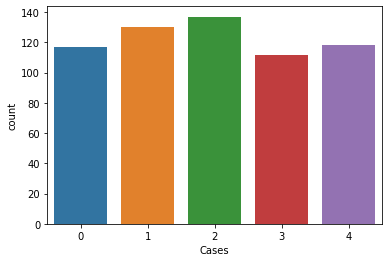

In [9]:
# categorical attributes visualization
sns.countplot(df['Cases'])

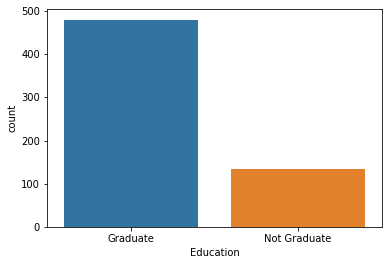

In [10]:
sns.countplot(df['Education'])

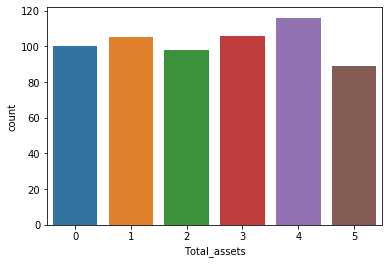

In [11]:
# rating
sns.countplot(df['Total_assets'])

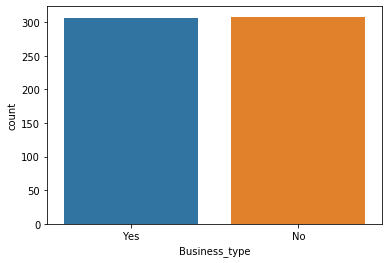

In [12]:
# yes / no
sns.countplot(df['Business_type'])

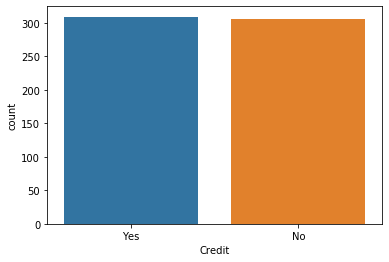

In [13]:
# yes / no
sns.countplot(df['Credit'])

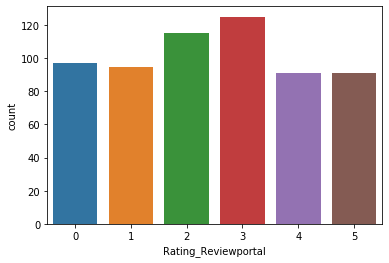

In [14]:
# rating
sns.countplot(df['Rating_Reviewportal'])

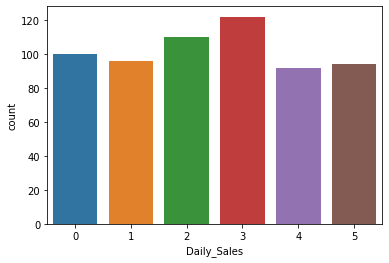

In [15]:
# rating
sns.countplot(df['Daily_Sales'])

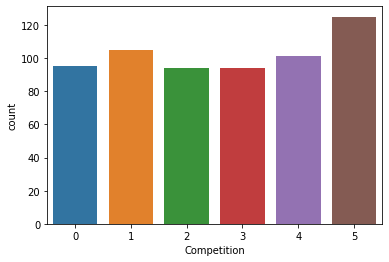

In [16]:
# rating
sns.countplot(df['Competition'])

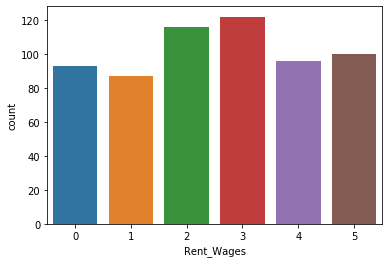

In [17]:
# rating
sns.countplot(df['Rent_Wages'])

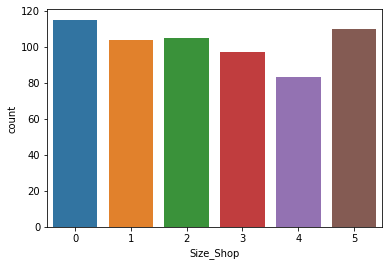

In [18]:
# rating
sns.countplot(df['Size_Shop'])

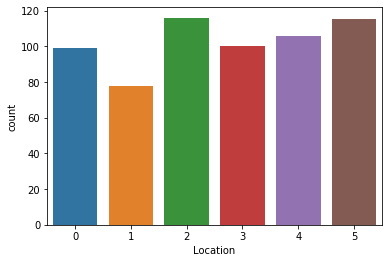

In [19]:
# rating
sns.countplot(df['Location'])

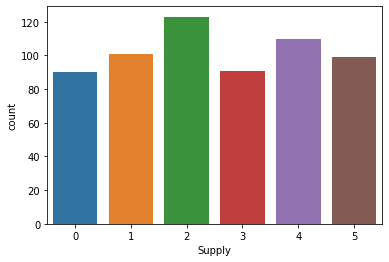

In [20]:
# rating
sns.countplot(df['Supply'])

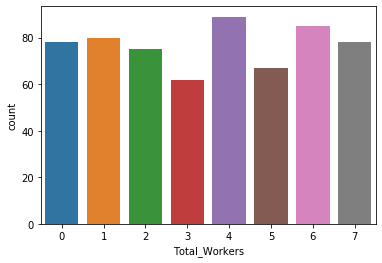

In [21]:
# value
sns.countplot(df['Total_Workers'])

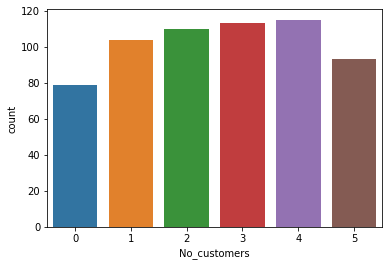

In [22]:
# rating
sns.countplot(df['No_customers'])

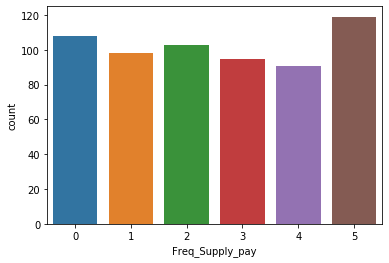

In [23]:
# rating
sns.countplot(df['Freq_Supply_pay'])

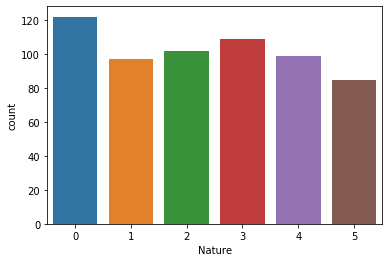

In [24]:
# rating
sns.countplot(df['Nature'])

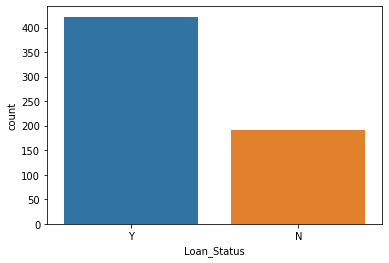

In [25]:
# target attribute
sns.countplot(df['Loan_Status'])

In [26]:
# total income
df['Total_Income'] = df['Applicant_Income'] + df['Family_Income']
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Total_Income
0,1,1,Graduate,5849,0.0,0,Yes,Yes,146.412162,360.0,...,1,3,0,3,6,4,0,0,Y,5849.0
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.000000,360.0,...,5,0,0,5,1,1,1,1,N,6091.0
2,3,0,Graduate,3000,0.0,0,No,Yes,66.000000,360.0,...,4,0,5,5,2,3,4,1,Y,3000.0
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.000000,360.0,...,3,2,5,3,7,4,5,1,Y,4941.0
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.000000,360.0,...,4,3,0,3,2,2,0,2,Y,6000.0


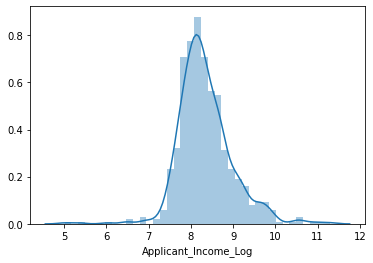

In [27]:
df['Applicant_Income_Log'] = np.log(df['Applicant_Income'])
sns.distplot(df['Applicant_Income_Log'])

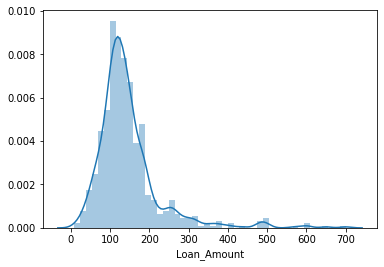

In [28]:
df['Loan_Amount_Log'] = np.log(df['Loan_Amount'])
sns.distplot(df['Loan_Amount'])

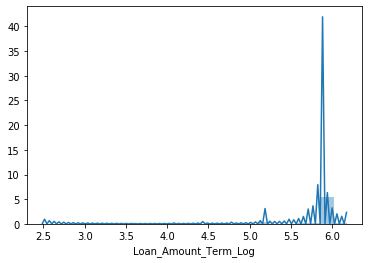

In [29]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

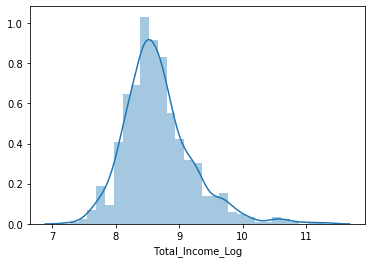

In [30]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

# Correlation Matrix

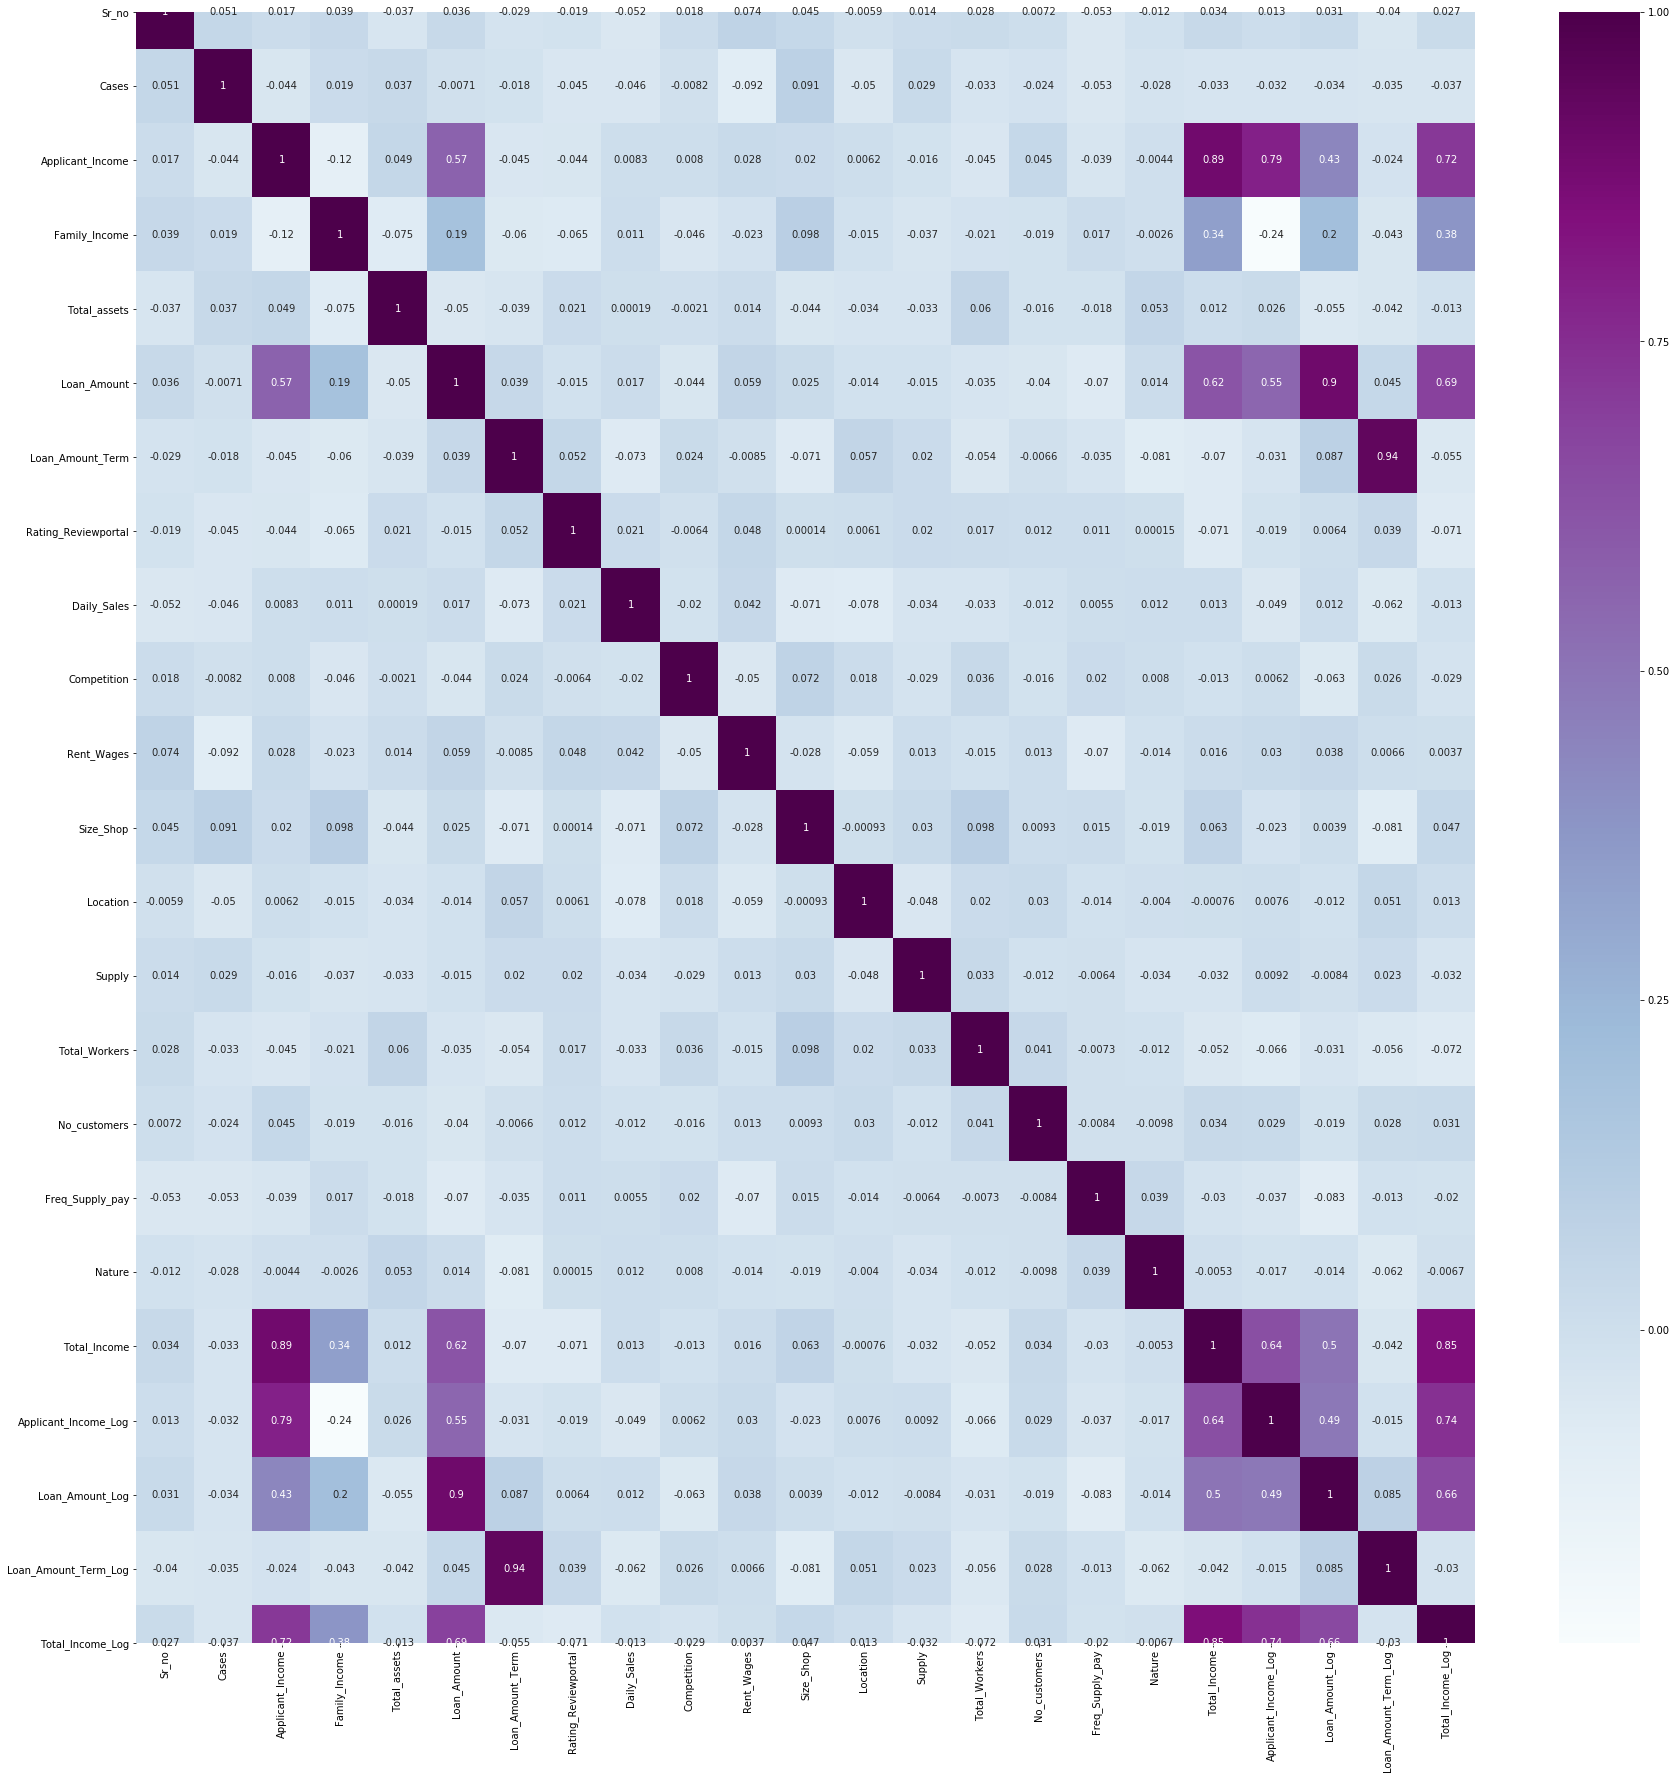

In [31]:
corr = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "BuPu")

In [32]:
df.head()

,Sr_no,Cases,Education,Applicant_Income,Family_Income,Total_assets,Business_type,Credit,Loan_Amount,Loan_Amount_Term,...,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Total_Income,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,Graduate,5849,0.0,0,Yes,Yes,146.412162,360.0,...,6,4,0,0,Y,5849.0,8.674026,4.986426,5.886104,8.674026
1,2,2,Graduate,4583,1508.0,3,No,Yes,128.000000,360.0,...,1,1,1,1,N,6091.0,8.430109,4.852030,5.886104,8.714568
2,3,0,Graduate,3000,0.0,0,No,Yes,66.000000,360.0,...,2,3,4,1,Y,3000.0,8.006368,4.189655,5.886104,8.006368
3,4,0,Not Graduate,2583,2358.0,2,Yes,No,120.000000,360.0,...,7,4,5,1,Y,4941.0,7.856707,4.787492,5.886104,8.505323
4,5,2,Graduate,6000,0.0,2,Yes,Yes,141.000000,360.0,...,2,2,0,2,Y,6000.0,8.699515,4.948760,5.886104,8.699515


In [33]:
# drop unnecessary columns
cols = ['Applicant_Income', 'Family_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Total_Income', 'Sr_no']
df = df.drop(columns = cols, axis =  1)
df.head()

,Cases,Education,Total_assets,Business_type,Credit,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,...,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,Graduate,0,Yes,Yes,5,0,3,1,3,...,3,6,4,0,0,Y,8.674026,4.986426,5.886104,8.674026
1,2,Graduate,3,No,Yes,2,1,0,5,0,...,5,1,1,1,1,N,8.430109,4.852030,5.886104,8.714568
2,0,Graduate,0,No,Yes,2,5,1,4,0,...,5,2,3,4,1,Y,8.006368,4.189655,5.886104,8.006368
3,0,Not Graduate,2,Yes,No,3,1,0,3,2,...,3,7,4,5,1,Y,7.856707,4.787492,5.886104,8.505323
4,2,Graduate,2,Yes,Yes,5,1,0,4,3,...,3,2,2,0,2,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Education', 'Loan_Status', 'Business_type', 'Credit']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Cases,Education,Total_assets,Business_type,Credit,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,...,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,1,5,0,3,1,3,...,3,6,4,0,0,1,8.674026,4.986426,5.886104,8.674026
1,2,0,3,0,1,2,1,0,5,0,...,5,1,1,1,1,0,8.430109,4.852030,5.886104,8.714568
2,0,0,0,0,1,2,5,1,4,0,...,5,2,3,4,1,1,8.006368,4.189655,5.886104,8.006368
3,0,1,2,1,0,3,1,0,3,2,...,3,7,4,5,1,1,7.856707,4.787492,5.886104,8.505323
4,2,0,2,1,1,5,1,0,4,3,...,3,2,2,0,2,1,8.699515,4.948760,5.886104,8.699515


In [35]:
# specify input and output attribute
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']

# Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [37]:
y_test.value_counts()

1    109
0     45
Name: Loan_Status, dtype: int64

In [38]:
y_train.value_counts()

1    313
0    147
Name: Loan_Status, dtype: int64

# Model Training

In [39]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)
    model.fit(x_train, y_train)
    print("Accuracy is ", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of the model
    # cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is ", np.mean(score)*100)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is  67.53246753246754
Cross validation is  66.61554732945532


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is  55.1948051948052
Cross validation is  55.692755156002114


In [42]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is  58.44155844155844
Cross validation is  63.51136964569011


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
model = xgb.XGBRegressor(n_estimators=100, reg_lambda=1, gamma=0, max_depth=3)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.2697947239521267

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[ 6, 39],
       [25, 84]], dtype=int64)

# Confusion Matrix

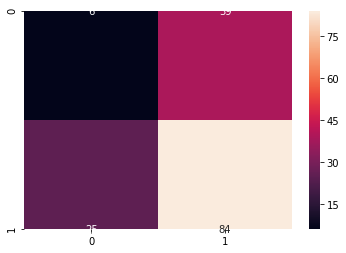

In [47]:
sns.heatmap(cm, annot = True)

In [48]:
y_train.value_counts()

1    313
0    147
Name: Loan_Status, dtype: int64

# Saving the Model

In [49]:
import pickle
saved_model = pickle.dumps(model)
saved_model_from_pickle = pickle.loads(saved_model)
saved_model_from_pickle.predict(x_test)

array([0.8598707 , 0.5877515 , 0.8515346 , 0.64950633, 0.78366673,
       0.7227138 , 0.16600668, 0.48282394, 0.8982531 , 0.7856406 ,
       0.60976386, 0.28638154, 0.70214   , 0.80018085, 0.37347215,
       0.64889497, 0.5621005 , 0.25687397, 0.8698096 , 0.22254682,
       0.37954682, 0.68742853, 0.09800673, 0.9684885 , 0.6074346 ,
       0.5715346 , 0.72193736, 0.537879  , 1.0196551 , 0.80284804,
       0.47441888, 0.3392228 , 0.75864536, 0.5430118 , 0.4612117 ,
       0.08506689, 0.96690387, 1.0623672 , 0.61061436, 0.4254362 ,
       0.7548808 , 0.77128047, 0.7772034 , 0.7324804 , 0.9674844 ,
       0.90781796, 0.9716415 , 1.1614248 , 0.73526394, 0.65155226,
       0.82869834, 0.6637775 , 0.6053545 , 0.62613195, 0.7678702 ,
       0.9453128 , 0.60697466, 0.41619155, 0.58832216, 0.24295771,
       0.84954864, 0.67341644, 1.0086402 , 1.0554198 , 0.7328819 ,
       0.80003077, 0.62048787, 0.18023923, 0.5517147 , 0.48698103,
       0.6726972 , 0.8441176 , 0.5783569 , 0.8636269 , 0.28463

In [50]:
import joblib
joblib.dump(model, 'model.pkl') 

['model.pkl']

In [55]:
x_test

,Cases,Education,Total_assets,Business_type,Credit,Rating_Reviewportal,Daily_Sales,Competition,Rent_Wages,Size_Shop,Location,Supply,Total_Workers,No_customers,Freq_Supply_pay,Nature,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
131,2,0,4,0,1,2,4,5,5,5,0,4,1,5,3,0,7.607878,4.304065,5.886104,8.279697
159,0,0,3,1,0,3,1,0,4,0,0,4,5,1,5,5,8.430109,5.541264,5.886104,9.230927
327,0,0,1,0,1,2,4,3,0,1,1,3,0,0,5,4,8.668712,5.214936,5.886104,8.984443
235,2,0,3,1,1,3,0,1,0,5,5,1,6,2,5,0,8.612503,5.135798,5.886104,8.818778
65,1,0,1,0,1,4,3,3,0,1,5,2,7,1,0,2,8.652772,5.552960,5.886104,9.241936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,3,1,5,0,0,0,4,5,5,4,1,0,7,2,5,0,7.900637,4.564348,5.886104,8.609590
542,0,0,3,1,0,5,4,1,3,5,5,5,1,1,4,2,8.203030,4.553877,5.886104,8.203030
3,0,1,2,1,0,3,1,0,3,2,5,3,7,4,5,1,7.856707,4.787492,5.886104,8.505323
521,4,0,2,1,0,0,3,3,0,4,2,4,6,5,2,0,7.824046,4.007333,5.886104,7.824046
